In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
from sklearn.metrics import confusion_matrix,roc_curve,auc,cohen_kappa_score
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import math
import random
from scipy.stats import t
import scipy.stats as st
import numpy as np
import collections
from numbers import Number
from __future__ import division
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 15, 6
use_colours = {0: "blue", 1: "red"}

In [68]:
df = pd.read_csv("fact_price_monthly_dairy.csv")

In [69]:
df.head()

,id,yearmonth,geo,unit,product,price,source
0,291650,201712,CHINA,EUR/kg,milk,NaN,clal_dairy_price
1,291649,201711,CHINA,EUR/kg,milk,NaN,clal_dairy_price
2,291648,201710,CHINA,EUR/kg,milk,NaN,clal_dairy_price
3,291647,201709,CHINA,EUR/kg,milk,NaN,clal_dairy_price
4,291646,201708,CHINA,EUR/kg,milk,NaN,clal_dairy_price


In [70]:
df.yearmonth = df.yearmonth.astype(str)

In [71]:
df["yearmonth"] = df.yearmonth.apply(lambda dates: datetime.strptime(dates, '%Y%m').strftime('%m/%Y'))

In [72]:
df['yearmonth'] = pd.to_datetime(df['yearmonth'])


In [73]:
df.price = df.price.fillna(np.mean(df.price))

In [74]:
df = df.reset_index(drop=True)
ts = df["price"]

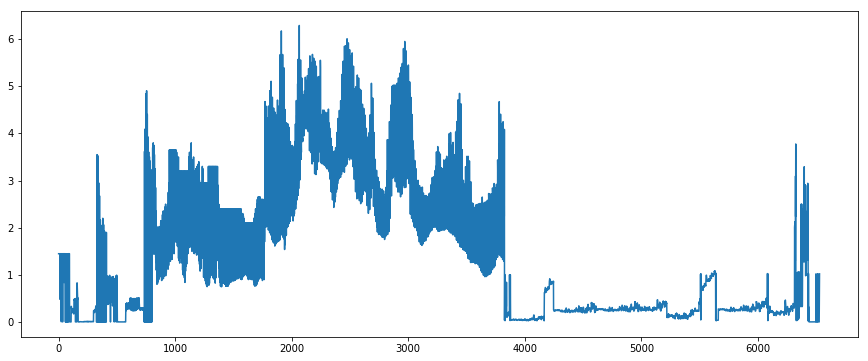

In [75]:
plt.plot(ts)


In [76]:
index = df.index.values

In [78]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

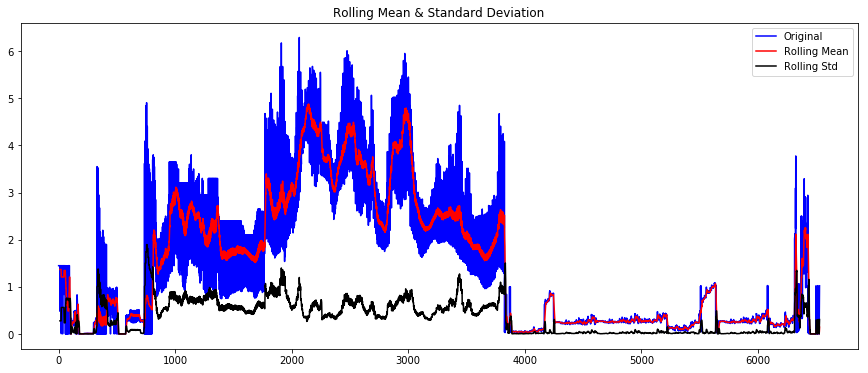

Results of Dickey-Fuller Test:
Test Statistic                   -2.155434
p-value                           0.222816
#Lags Used                       35.000000
Number of Observations Used    6494.000000
Critical Value (5%)              -2.861985
Critical Value (1%)              -3.431357
Critical Value (10%)             -2.567007
dtype: float64


In [79]:
test_stationarity(ts)

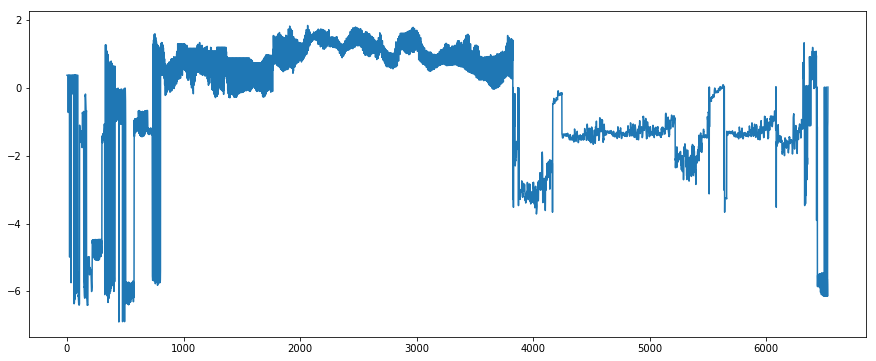

In [80]:
ts_log = np.log(ts)
plt.plot(ts_log)

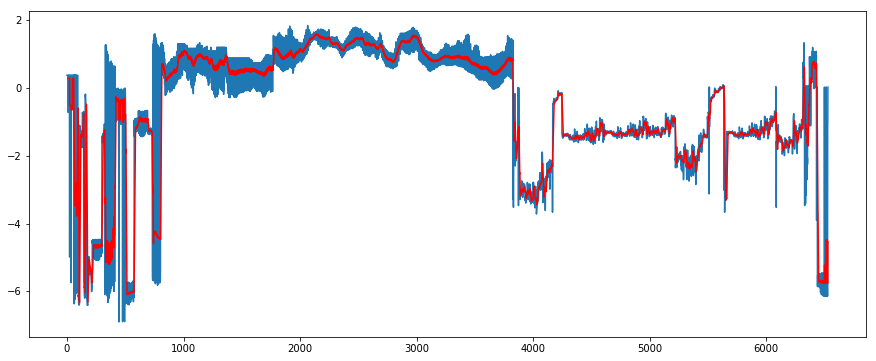

In [81]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')


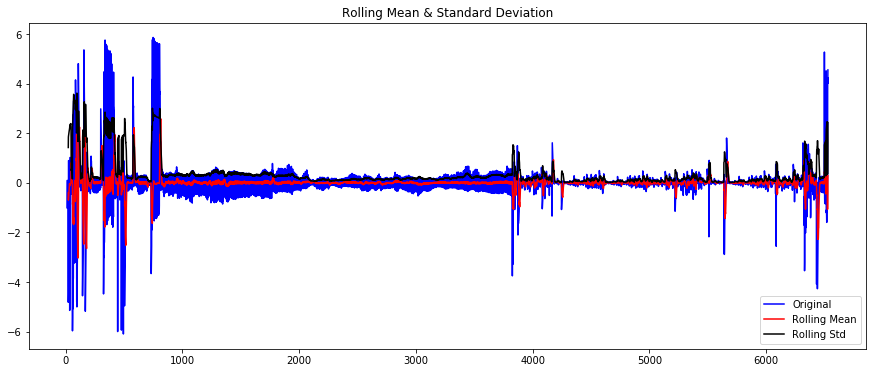

Results of Dickey-Fuller Test:
Test Statistic                -1.329569e+01
p-value                        7.213751e-25
#Lags Used                     3.400000e+01
Number of Observations Used    6.484000e+03
Critical Value (5%)           -2.861986e+00
Critical Value (1%)           -3.431359e+00
Critical Value (10%)          -2.567007e+00
dtype: float64


In [82]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff = ts_log_moving_avg_diff.dropna()
test_stationarity(ts_log_moving_avg_diff)

In [87]:
ts_log_moving_avg_diff =  ts_log_moving_avg_diff.reset_index(drop=True)

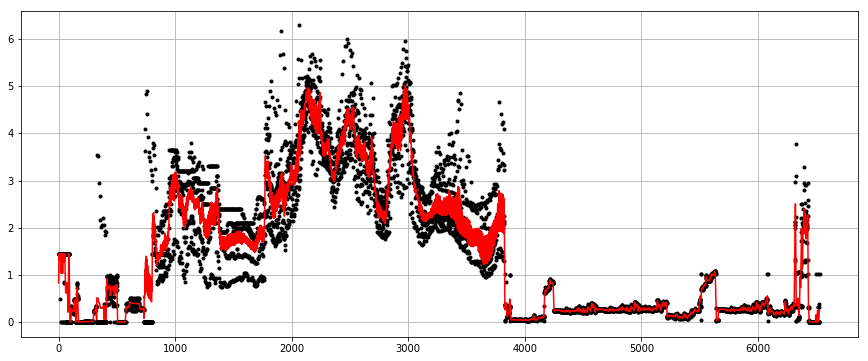

In [88]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

x = index
y = df.price


plt.plot(x,y,"k.")
y_av = movingaverage(y, 7)
plt.plot(x, y_av,"r")
plt.grid(True)
plt.show()

std = np.std(y_av)
events= []
ind = []
for i in range(len(ts_log_moving_avg_diff)):
    if ts_log_moving_avg_diff[i] > y_av[i]+std:
        events.append(ts_log_moving_avg_diff[i])

In [89]:
len(events)

96